1

In [215]:
import pandas as pd
import numpy as np

In [216]:
from sklearn.datasets import load_boston

In [217]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [218]:
boston = load_boston()

In [219]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [220]:
data = boston.data

In [221]:
data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [222]:
target = boston.target

In [223]:
feature_names = boston.feature_names

In [224]:
feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [225]:
X = pd.DataFrame(data, columns=feature_names)

In [226]:
y = pd.DataFrame(target, columns=['price'])

In [227]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [228]:
y.head()

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [229]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [230]:
lr = LinearRegression()

In [231]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [232]:
y_pred = lr.predict(X_test)

In [233]:
check_test = pd.DataFrame({'y_test': y_test['price'], 
                           'y_pred': y_pred.flatten()}, 
                          columns=['y_test', 'y_pred'])

In [234]:
check_test.head(10)

,y_test,y_pred
173,23.6,28.648960
274,32.4,36.495014
491,13.6,15.411193
72,22.8,25.403213
452,16.1,18.855280
76,20.0,23.146689
316,17.8,17.392124
140,14.0,14.078599
471,19.6,23.036927
500,16.8,20.599433


In [235]:
check_test['error'] = check_test['y_pred'] - check_test['y_test']

In [236]:
check_test.head()

,y_test,y_pred,error
173,23.6,28.648960,5.048960
274,32.4,36.495014,4.095014
491,13.6,15.411193,1.811193
72,22.8,25.403213,2.603213
452,16.1,18.855280,2.755280


In [237]:
initial_mse = (check_test['error'] ** 2).mean()
initial_mse

21.517444231177

In [238]:
initial_mse = mean_squared_error(y_test, y_pred)
initial_mse

21.517444231176995

In [239]:
(np.abs(check_test['error'])).mean()

3.162709871457379

In [240]:
mean_absolute_error(y_test, y_pred)

3.1627098714573783

In [241]:
r2_score(y_test, y_pred)

0.711226005748496

In [242]:
lr.intercept_

array([31.63108404])

In [243]:
lr.coef_

array([[-1.33470103e-01,  3.58089136e-02,  4.95226452e-02,
         3.11983512e+00, -1.54170609e+01,  4.05719923e+00,
        -1.08208352e-02, -1.38599824e+00,  2.42727340e-01,
        -8.70223437e-03, -9.10685208e-01,  1.17941159e-02,
        -5.47113313e-01]])

In [244]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

Text(0, 0.5, 'Признак')

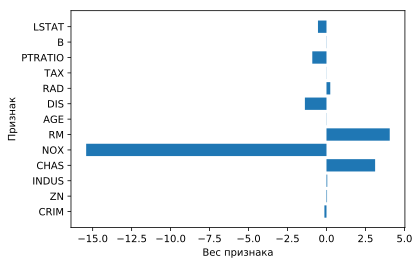

In [245]:
plt.barh(X_train.columns, lr.coef_.flatten())
plt.xlabel('Вес признака')
plt.ylabel('Признак')

In [246]:
X_train.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000
mean,3.469887,11.403955,11.133051,0.073446,0.557259,6.325672,68.799718,3.765874,9.437853,407.042373,18.277966,359.701808,12.421130
std,8.315831,22.608457,6.938651,0.261237,0.116792,0.719211,27.665360,2.126032,8.639971,166.522237,2.256792,86.924779,7.112402
min,0.009060,0.000000,1.210000,0.000000,0.385000,3.863000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082320,0.000000,5.130000,0.000000,0.450000,5.889500,46.025000,2.073700,4.000000,279.000000,16.650000,376.782500,6.862500
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.227500,77.350000,3.107300,5.000000,330.000000,18.600000,391.600000,10.925000
75%,3.281688,20.000000,18.100000,0.000000,0.631000,6.681750,93.475000,5.400700,24.000000,666.000000,20.200000,396.172500,16.225000
max,88.976200,95.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [247]:
from sklearn.preprocessing import StandardScaler

In [248]:
scaler = StandardScaler()

In [249]:
X_train_scaled = scaler.fit_transform(X_train)

In [250]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)

In [251]:
X_test_scaled = scaler.transform(X_test)

In [252]:
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [253]:
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

Text(0, 0.5, 'Признак')

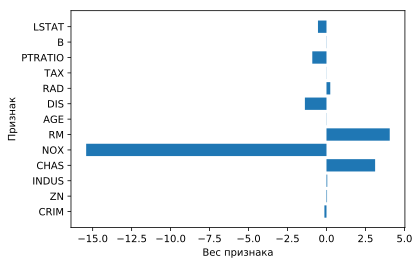

In [254]:
plt.barh(X_train.columns, lr.coef_.flatten())
plt.xlabel('Вес признака')
plt.ylabel('Признак')

In [255]:
feats = ['CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']

In [256]:
def create_model(X_train, y_train, X_test, y_test, feats, model):
    model.fit(X_train.loc[:, feats], y_train)
    y_pred=model.predict(X_test.loc[:, feats])
    mse = mean_squared_error(y_test, y_pred)
    return mse

In [257]:
create_model(X_train_scaled, y_train, X_test_scaled, y_test, feats, LinearRegression())

21.243390345509397

In [258]:
initial_mse

21.517444231176995

2

In [259]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [260]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from pylab import rcParams

In [261]:
model = RandomForestRegressor(n_estimators=1000, max_depth=12, random_state=42)

In [262]:
X_train.to_pickle('X_train.pkl')
y_train.to_pickle('y_train.pkl')

X_test.to_pickle('X_test.pkl')
y_test.to_pickle('y_test.pkl')

In [263]:
X_train = pd.read_pickle('X_train.pkl')
y_train = pd.read_pickle('y_train.pkl')

In [264]:
X_test = pd.read_pickle('X_test.pkl')
y_test = pd.read_pickle('y_test.pkl')

In [265]:
sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test)

In [266]:
model.fit(X_train,y_train.values[:,0])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=12,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [267]:
y1_pred = model.predict(X_test)  
print(y1_pred)

[22.84175041 31.15561352 16.29722565 23.82103598 17.21214765 21.83710567
 19.86756868 14.75993798 21.2352238  20.88310344 20.11537257 19.98379932
  8.04139649 21.50286165 19.37751421 25.22123965 18.86277442  8.48509459
 45.8517     15.50158646 24.37811149 23.99980575 14.54325214 23.58976176
 15.03542553 15.25989983 21.5527746  13.95762333 19.62523439 21.0338126
 19.70097776 23.23032956 30.04524357 20.12207811 14.39726619 16.0512163
 34.30138623 19.17703229 21.11179576 24.23279505 18.63348333 29.54299089
 45.5721     19.61894079 22.62028203 13.9461684  15.72148872 24.47776906
 19.12640766 28.25341645 21.36443649 33.89549611 17.70003733 26.2960691
 45.92394    21.87528392 15.85960641 32.42894361 22.15625161 20.61280516
 25.45688804 33.69806617 30.10206874 19.02315904 27.11721893 16.92785667
 13.87749764 23.11178339 28.85460833 15.60364655 20.70795365 28.5286223
 10.40433229 22.1418881  22.27053869  6.84662173 20.02233942 46.1973
 11.22435578 12.343395   21.65989308 11.71659804 20.0050155

In [268]:
r2_score(y_test, y1_pred)

0.8748630821769202

lr r2 = 0.711226005748496, rf r2 = 0.8748630821769202


3


In [169]:
print(model.feature_importances_)

[0.03211748 0.00154999 0.0070941  0.0011488  0.01436832 0.40270459
 0.01424477 0.06403265 0.00496762 0.01169177 0.01808961 0.0123114
 0.41567892]


In [175]:
np.sum(model.feature_importances_)

0.9999999999999994

[0.03211748 0.00154999 0.0070941  0.0011488  0.01436832 0.40270459
 0.01424477 0.06403265 0.00496762 0.01169177 0.01808961 0.0123114
 0.41567892]


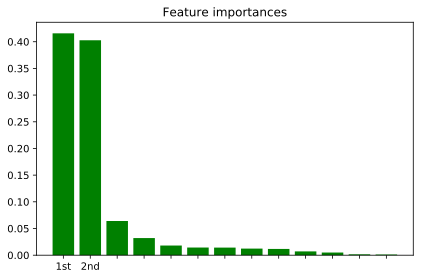

In [170]:
importances = model.feature_importances_
print(importances)
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
 
indices = np.argsort(importances)[::-1]
names_indices = ['1st', '2nd']
 
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
 
plt.bar(range(len(importances)), importances[indices], color="g")
plt.xticks(range(len(importances)), names_indices)
 
plt.tight_layout()
plt.xlim([-1, len(importances)])
plt.show()

In [145]:
RandomForestRegressor?

4

будет ли в принципе разбор всех ДЗ?

In [269]:
df = pd.read_csv('D:/homeworks_dump/creditcard.csv')

In [276]:
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [278]:
X = df.drop('Class', axis=1)

In [280]:
X.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68


In [284]:
y = df['Class']

In [287]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100, stratify=y)

In [289]:
X_train.shape

(199364, 30)

In [291]:
X_test.shape

(85443, 30)

In [293]:
y_train.shape

(199364,)

In [295]:
y_test.shape

(85443,)

In [297]:
parameters = [{'n_estimators': [10, 15], 
               'max_features': np.arange(3, 5),
               'max_depth': np.arange(4, 7)}]

In [299]:
from sklearn.ensemble import RandomForestClassifier

In [303]:
clf = GridSearchCV(estimator=RandomForestClassifier(random_state=100), 
                   param_grid=parameters,
                   scoring='roc_auc',
                   cv=3)

In [305]:
clf.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=100, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_estimators': [10, 15], 'max_features': array([3, 4]), 'max_depth': array([4, 5, 6])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [302]:
clf.best_params_

{'max_depth': 6, 'max_features': 3, 'n_estimators': 15}

In [350]:
from sklearn.metrics import roc_auc_score
from sklearn import metrics

In [351]:
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']

for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

0.930 (+/-0.052) for {'max_depth': 4, 'max_features': 3, 'n_estimators': 10}
0.938 (+/-0.061) for {'max_depth': 4, 'max_features': 3, 'n_estimators': 15}
0.941 (+/-0.021) for {'max_depth': 4, 'max_features': 4, 'n_estimators': 10}
0.956 (+/-0.020) for {'max_depth': 4, 'max_features': 4, 'n_estimators': 15}
0.949 (+/-0.057) for {'max_depth': 5, 'max_features': 3, 'n_estimators': 10}
0.949 (+/-0.048) for {'max_depth': 5, 'max_features': 3, 'n_estimators': 15}
0.960 (+/-0.026) for {'max_depth': 5, 'max_features': 4, 'n_estimators': 10}
0.963 (+/-0.026) for {'max_depth': 5, 'max_features': 4, 'n_estimators': 15}
0.955 (+/-0.021) for {'max_depth': 6, 'max_features': 3, 'n_estimators': 10}
0.966 (+/-0.013) for {'max_depth': 6, 'max_features': 3, 'n_estimators': 15}
0.956 (+/-0.011) for {'max_depth': 6, 'max_features': 4, 'n_estimators': 10}
0.960 (+/-0.007) for {'max_depth': 6, 'max_features': 4, 'n_estimators': 15}


In [352]:
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9993328885923949

In [353]:
accuracy_score(y_test, y_pred)

0.9993328885923949

In [354]:
y_proba = clf.predict_proba(X_test)

In [355]:
y_proba

array([[9.99070828e-01, 9.29171738e-04],
       [9.99704794e-01, 2.95206364e-04],
       [9.99717846e-01, 2.82154033e-04],
       ...,
       [9.99717846e-01, 2.82154033e-04],
       [9.99317795e-01, 6.82204754e-04],
       [9.87539019e-01, 1.24609813e-02]])

In [356]:
y_pred_proba = y_proba[:,1]

In [357]:
y_pred_proba

array([0.00092917, 0.00029521, 0.00028215, ..., 0.00028215, 0.0006822 ,
       0.01246098])

In [360]:
roc_auc_score( y_test, y_pred_proba )

0.9462664156037156